In [9]:
#Importing Libraries 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import urllib.request
from tkinter import *
from PIL import Image,ImageTk

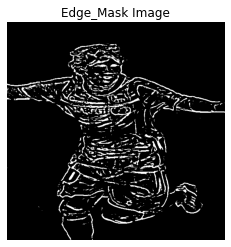

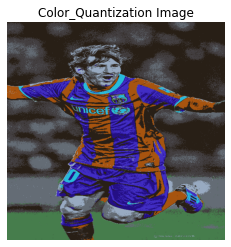

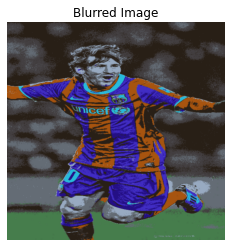

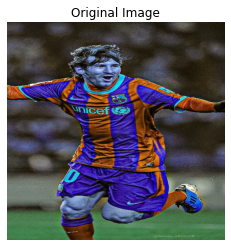

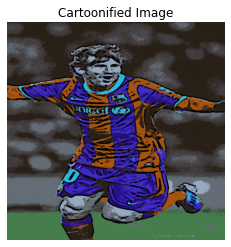

In [116]:
#Creating Tkinter Window with fixed background
root= Tk()
root.title("Cartoonify")
root.geometry('750x500')
load = Image.open("E:\\Intern'spedia\\Cartoonify\\bg1.jpg")
render = ImageTk.PhotoImage(load)
img = Label(root,image = render)
img.place(x=0,y=0)
    





#Function For URL Image
def url():
    #Function to load Image from website
    def read_file(filename):
        img = cv2.imread(filename)
        img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        return img 
    
    
    filename = url = url_entry.get()
    url_response = urllib.request.urlopen(url)
    img_array = np.array(bytearray(url_response.read()), dtype = np.uint8)
    img = cv2.imdecode(img_array, 1)
    img = cv2.resize(img, (600,600))
    cv2.imshow('cartoon image',img)
    cv2.waitKey()
    
    org_img = np.copy(img)
    
    #Function to Create Edge Mask 
    def edge_mask(img, line_size, blur_value):
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray_blur = cv2.medianBlur(gray, blur_value)
        edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
        return edges

    
    line_size, blur_value = 7,7
    edges = edge_mask(img, line_size, blur_value)
    plt.imshow(edges, cmap= "binary")
    plt.title("Edge_Mask Image")
    plt.axis('off')
    plt.show()
    
    
    #Function to Reduce Color Palette
    def color_quantization(img, k):
        data = np.float32(img).reshape((-1,3))
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
        ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
        center = np.uint8(center)
        result = center[label.flatten()]
        result = result.reshape(img.shape)
        return result
    
    
    img = color_quantization(img, k=9)
    plt.imshow(img)
    plt.title("Color_Quantization Image")
    plt.axis('off')
    plt.show()
    
    #Reduce the noise
    blurred = cv2.bilateralFilter(img, d = 3, sigmaColor= 200, sigmaSpace= 200)
    plt.imshow(blurred)
    plt.title("Blurred Image")
    plt.axis('off')
    plt.show()
   

    #Combine Edge Mask with the Quantiz Image
    def cartoon():
        c = cv2.bitwise_and(blurred, blurred, mask= edges)
        plt.imshow(org_img)
        plt.title("Original Image")
        plt.axis('off')
        plt.show()
        plt.imshow(c)
        plt.title("Cartoonified Image")
        plt.axis('off')
        plt.show()

    #Call The function    
    cartoon()
    
    
    
#Function For Local Image
def local():
    #Function to load Image from Local file
    def read_file(filename):
        img = cv2.imread(filename)
        img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        return img
    
    
    filename = url_entry.get()
    img = read_file(filename)
    
    org_img = np.copy(img)
    
        #Function to Create Edge Mask 
    def edge_mask(img, line_size, blur_value):
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray_blur = cv2.medianBlur(gray, blur_value)
        edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
        return edges

    
    line_size, blur_value = 7,7
    edges = edge_mask(img, line_size, blur_value)
    plt.imshow(edges, cmap= "binary")
    plt.title("Edge_Mask Image")
    plt.axis('off')
    plt.show()
    
    
        #Function to Reduce Color Palette
    def color_quantization(img, k):
        data = np.float32(img).reshape((-1,3))
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
        ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
        center = np.uint8(center)
        result = center[label.flatten()]
        result = result.reshape(img.shape)
        return result
    
    
    img = color_quantization(img, k=9)
    plt.imshow(img)
    plt.title("Color_Quantization Image")
    plt.axis('off')
    plt.show()
    
    
        #Reduce the noise
    blurred = cv2.bilateralFilter(img, d = 3, sigmaColor= 200, sigmaSpace= 200)
    plt.imshow(blurred)
    plt.title("Blurred Image")
    plt.axis('off')
    plt.show()
    
        #Combine Edge Mask with the Quantiz Image
    def cartoon():
        c = cv2.bitwise_and(blurred, blurred, mask= edges)
        plt.imshow(org_img)
        plt.title("Original Image")
        plt.axis('off')
        plt.show()
        plt.imshow(c)
        plt.title("Cartoonified Image")
        plt.axis('off')
        plt.show()

    #Call the function
    cartoon()
    


    


#Creating URL Button   
btn_img = PhotoImage(file = "E:\\Intern'spedia\\Cartoonify\\yurl.png")
b1 = Button(root, image = btn_img, bd= 0,bg='#A72FF3',activebackground='#A72FF3', command= url)
b1.place(x=10, y=195)

#Creating Local Image Button
btn_loc = PhotoImage(file = "E:\\Intern'spedia\\Cartoonify\\ylocal.png")
b2 = Button(root, image = btn_loc, bd= 0,bg='#A72FF3',activebackground='#A72FF3', command= local)
b2.place(x=540, y=195)


#Creating Cartoonify Text
txt_img = PhotoImage(file ="E:\\Intern'spedia\\Cartoonify\\text.png")
l1 = Label(root, image = txt_img,bd= 0,bg='#C465FF',activebackground='#C465FF')
l1.place(x=1,y=1)




#Creating Entry Field
url_entry = Entry()
url_entry.pack(padx=200,pady=220)




#Show Tkinter Window
root.mainloop()